<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/16_mmdet/Training%20and%20Inference%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/16_mmdet/installation
     
 - Select the right file and run
 
     - chmod +x install.sh && ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/16_mmdet/installation && chmod +x install.sh && ./install.sh

# COCO Format - 1

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |                |-------Val (set_dir) (Validation)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)  
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------instances_Val.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Train";
 
For ValSet
 - root_dir = "..sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Val";
 
 Note: Annotation file name too coincides against the set_dir

# COCO Format - 2

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---ImagesVal (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------instances_ImagesVal.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesTrain";
 
 
  For ValSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesVal";
 
 Note: Annotation file name too coincides against the set_dir
 

In [ ]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

In [4]:
img_dir = "ship/Images";
annofile = "ship/annotations/instances_Images.json"
class_file = "ship/classes.txt"

gtf.Train_Dataset(img_dir, annofile, class_file);

In [ ]:
#Optional
img_dir = "ship/Images";
annofile = "ship/annotations/instances_Images.json"

gtf.Val_Dataset(img_dir, annofile);

In [5]:
gtf.Dataset_Params(batch_size=2, num_workers=2)

In [6]:
gtf.List_Models();

1. Model - faster_rcnn_fpn50
2. Model - faster_rcnn_fpn101
3. Model - faster_rcnn_x101_32x4d_fpn
4. Model - faster_rcnn_x101_64x4d_fpn


In [7]:
gtf.Model_Params(model_name="faster_rcnn_x101_64x4d_fpn");

In [8]:
gtf.Hyper_Params(lr=0.02, momentum=0.9, weight_decay=0.0001);

In [9]:
gtf.Training_Params(num_epochs=2, val_interval=1);

In [10]:
gtf.Train();

2020-08-23 03:55:39,330 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda-10.0
NVCC: Cuda compilation tools, release 10.0, V10.0.130
GPU 0: Tesla V100-SXM2-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37

2020-08-23 03:55:40,944 - mmdet - INFO - load model from: open-mmlab://resnext101_64x4d
Downloading: "https://open-mmlab.s3.ap-northeast-2.amazonaws.com/pretrain/third_party/resnext101_64x4d-ee2c6f71.pth" to /home/ubuntu/.cache/torch/checkpoints/resnext101_64x4d-ee2c6f71.pth
100.0%


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2020-08-23 03:56:26,581 - mmdet - INFO - load checkpoint from https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Downloading: "https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth" to /home/ubuntu/.cache/torch/checkpoints/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth
100.0%
2020-08-23 03:57:15,592 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([6, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([6]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([20, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkp

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 750/750, 8.5 task/s, elapsed: 88s, ETA:     0s

2020-08-23 04:04:25,090 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.49s).
Accumulating evaluation results...


2020-08-23 04:04:26,904 - mmdet - INFO - Epoch [1][375/375]	lr: 1.497e-02, bbox_mAP: 0.2230, bbox_mAP_50: 0.5360, bbox_mAP_75: 0.1630, bbox_mAP_s: 0.1590, bbox_mAP_m: 0.1300, bbox_mAP_l: 0.2870, bbox_mAP_copypaste: 0.223 0.536 0.163 0.159 0.130 0.287


DONE (t=0.27s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.223
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.536
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.163
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.159
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.130
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.287
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.405
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.405
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.405
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.227
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.325
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.315


2020-08-23 04:05:14,208 - mmdet - INFO - Epoch [2][50/375]	lr: 1.696e-03, eta: 0:04:39, time: 0.946, data_time: 0.051, memory: 9563, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0091, loss_cls: 0.1005, acc: 96.5820, loss_bbox: 0.1575, loss: 0.2701
2020-08-23 04:05:59,328 - mmdet - INFO - Epoch [2][100/375]	lr: 1.896e-03, eta: 0:03:57, time: 0.902, data_time: 0.007, memory: 9563, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0097, loss_cls: 0.1104, acc: 95.9863, loss_bbox: 0.1764, loss: 0.2991
2020-08-23 04:06:44,433 - mmdet - INFO - Epoch [2][150/375]	lr: 2.000e-03, eta: 0:03:15, time: 0.902, data_time: 0.007, memory: 9563, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0087, loss_cls: 0.1077, acc: 96.1738, loss_bbox: 0.1634, loss: 0.2829
2020-08-23 04:07:29,557 - mmdet - INFO - Epoch [2][200/375]	lr: 2.000e-03, eta: 0:02:32, time: 0.902, data_time: 0.007, memory: 9563, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0078, loss_cls: 0.0954, acc: 96.3555, loss_bbox: 0.1617, loss: 0.2671
2020-08-23 04:08:14,675 - mmd

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 750/750, 8.5 task/s, elapsed: 88s, ETA:     0s

2020-08-23 04:11:36,505 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2020-08-23 04:11:37,834 - mmdet - INFO - Epoch [2][375/375]	lr: 2.000e-03, bbox_mAP: 0.4300, bbox_mAP_50: 0.7930, bbox_mAP_75: 0.3540, bbox_mAP_s: 0.2010, bbox_mAP_m: 0.3420, bbox_mAP_l: 0.6010, bbox_mAP_copypaste: 0.430 0.793 0.354 0.201 0.342 0.601


DONE (t=1.11s).
Accumulating evaluation results...
DONE (t=0.18s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.430
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.793
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.354
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.201
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.342
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.601
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.220
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.487
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large |

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model_Params("work_dirs/config_updated/config_updated.py", 
                 "work_dirs/config_updated/latest.pth")

In [5]:
result = gtf.Predict(img_path="ship/test/img1.jpg",
           out_img_path="result.jpg",
           thresh=0.3);

Inference Time: 0.16232967376708984 sec
Saving Time: 0.023424148559570312 sec


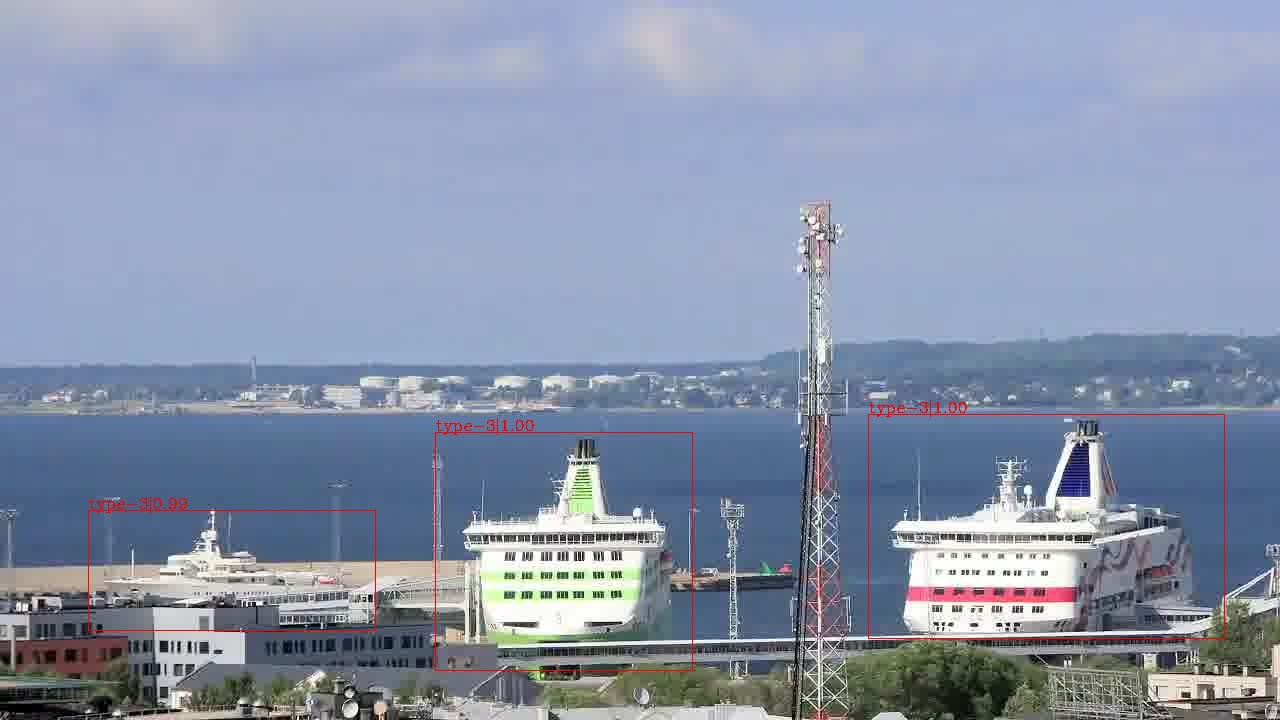

In [6]:
from IPython.display import Image
Image(filename='result.jpg') 

In [7]:
result = gtf.Predict(img_path="ship/test/img5.jpg",
           out_img_path="result.jpg",
           thresh=0.3);

Inference Time: 0.14613938331604004 sec
Saving Time: 0.022716760635375977 sec


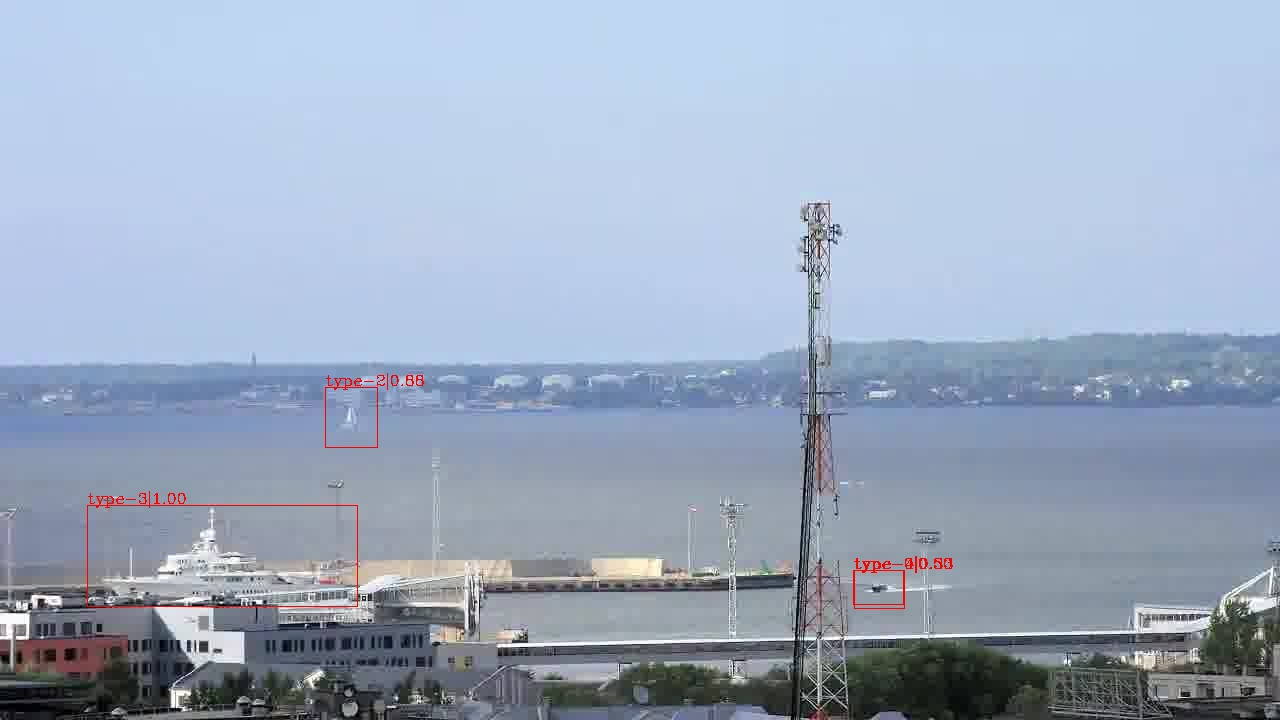

In [8]:
from IPython.display import Image
Image(filename='result.jpg') 